In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, k):
        self.k = k
        self.means = np.random.normal(0, 1, k)

    def pull(self, action):
        return np.random.normal(self.means[action], 1)

class EpsilonGreedy:
    def __init__(self, epsilon, k):
        self.epsilon = epsilon
        self.k = k
        self.Q = np.zeros(k)
        self.N = np.zeros(k)

    def select_action(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.Q)

    def update(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (1 / self.N[action]) * (reward - self.Q[action])

class UCB:
    def __init__(self, c, k):
        self.c = c
        self.k = k
        self.Q = np.zeros(k)
        self.N = np.zeros(k)
        self.t = 0

    def select_action(self):
        self.t += 1
        if self.t <= self.k:
            return self.t - 1
        else:
            return np.argmax(self.Q + self.c * np.sqrt(np.log(self.t) / self.N))

    def update(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (1 / self.N[action]) * (reward - self.Q[action])

class ThompsonSampling:
    def __init__(self, k):
        self.k = k
        self.alpha = np.ones(k)
        self.beta = np.ones(k)

    def select_action(self):
        theta = np.zeros(self.k)
        for i in range(self.k):
            theta[i] = np.random.beta(self.alpha[i], self.beta[i])
        return np.argmax(theta)

    def update(self, action, reward):
        if reward == 1:
            self.alpha[action] += 1
        else:
            self.beta[action] += 1

class GradientBandit:
    def __init__(self, alpha, k):
        self.alpha = alpha
        self.k = k
        self.H = np.zeros(k)
        self.Pi = np.zeros(k)

    def select_action(self):
        self.Pi = np.exp(self.H) / np.sum(np.exp(self.H))
        return np.random.choice(np.arange(self.k), p=self.Pi)

    def update(self, action, reward):
        R_bar = np.mean(reward)
        for a in range(self.k):
            if a == action:
                self.H[a] += self.alpha * (reward - R_bar) * (1 - self.Pi[a])
            else:
                self.H[a] -= self.alpha * (reward - R_bar) * self.Pi[a]

def run_bandit_algorithm(algo, bandit, num_steps):
    rewards = np.zeros(num_steps)
    num_optimal = 0
    optimal_action = np.argmax(bandit.means)
    for i in range(num_steps):
        action = algo.select_action()
        reward = bandit.pull(action)
        rewards[i] = reward
        if action == optimal_action:
            num_optimal += 1
        algo.update(action, reward)
    cumulative_rewards = np.cumsum(rewards)
    average_rewards = cumulative_rewards / np.arange(1, num_steps+1)
    return average_rewards, num_optimal / num_steps


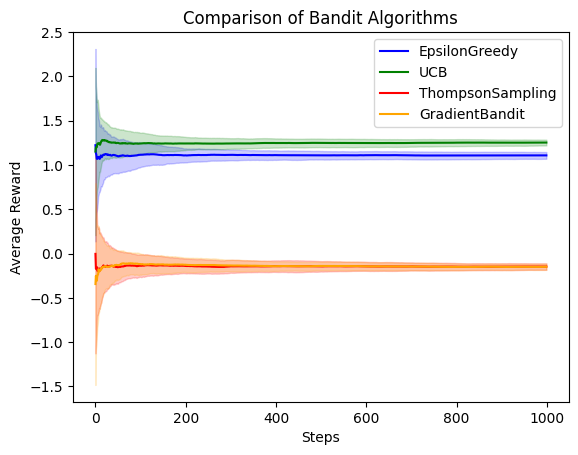

In [2]:
bandit = Bandit(k=10)
eps_greedy = EpsilonGreedy(epsilon=0.1, k=10)
ucb = UCB(c=2, k=10)
thompson_sampling = ThompsonSampling(k=10)
gradient_bandit = GradientBandit(alpha=0.1, k=10)

num_runs = 100
num_steps = 1000

colors=['blue','green','red','orange']
algo_index=0

for algo in [eps_greedy, ucb, thompson_sampling, gradient_bandit]:
    all_rewards = np.zeros((num_runs, num_steps))
    for i in range(num_runs):
        run_rewards, _ = run_bandit_algorithm(algo, bandit, num_steps=num_steps)
        all_rewards[i] = run_rewards
    avg_rewards = np.mean(all_rewards, axis=0)
    std_rewards = np.std(all_rewards, axis=0)
    upper_bound = avg_rewards + std_rewards
    lower_bound = avg_rewards - std_rewards
    plt.plot(avg_rewards, alpha=1.0, color=colors[algo_index], label=type(algo).__name__)
    plt.fill_between(range(num_steps), upper_bound, lower_bound, alpha=0.2, color=colors[algo_index])
    algo_index+=1

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Comparison of Bandit Algorithms')
plt.legend()
plt.show()


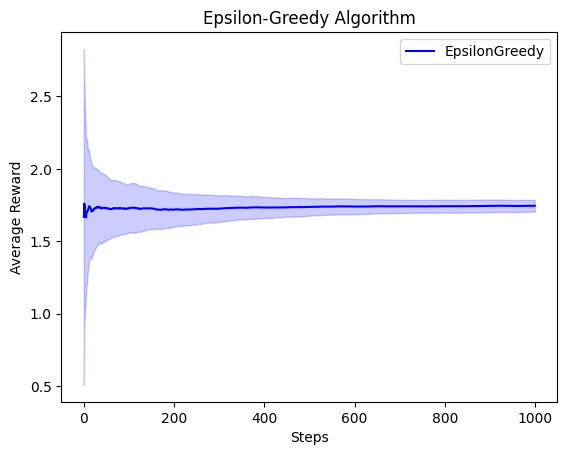

In [3]:
bandit = Bandit(k=10)
epsilon_greedy = EpsilonGreedy(epsilon=0.1, k=10)

num_steps=1000
num_runs=100
all_rewards = np.zeros((num_runs, num_steps))
for i in range(num_runs):
    run_rewards, _ = run_bandit_algorithm(epsilon_greedy, bandit, num_steps=num_steps)
    all_rewards[i] = run_rewards
avg_rewards = np.mean(all_rewards, axis=0)
std_rewards = np.std(all_rewards, axis=0)
upper_bound = avg_rewards + std_rewards
lower_bound = avg_rewards - std_rewards
plt.plot(avg_rewards, alpha=1.0, color='blue', label=type(epsilon_greedy).__name__)
plt.fill_between(range(num_steps), upper_bound, lower_bound, alpha=0.2, color='blue')

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Epsilon-Greedy Algorithm')
plt.legend()
plt.show()

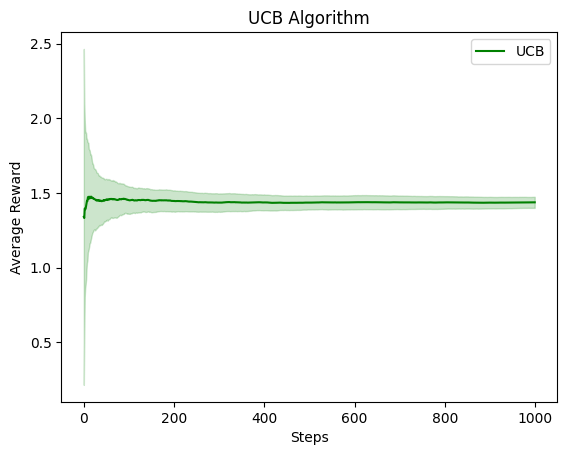

In [4]:
bandit = Bandit(k=10)
ucb = UCB(c=2, k=10)

num_steps=1000
num_runs=100
all_rewards = np.zeros((num_runs, num_steps))
for i in range(num_runs):
    run_rewards, _ = run_bandit_algorithm(ucb, bandit, num_steps=num_steps)
    all_rewards[i] = run_rewards
avg_rewards = np.mean(all_rewards, axis=0)
std_rewards = np.std(all_rewards, axis=0)
upper_bound = avg_rewards + std_rewards
lower_bound = avg_rewards - std_rewards
plt.plot(avg_rewards, alpha=1.0, color='green', label=type(ucb).__name__)
plt.fill_between(range(num_steps), upper_bound, lower_bound, alpha=0.2, color='green')

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('UCB Algorithm')
plt.legend()
plt.show()

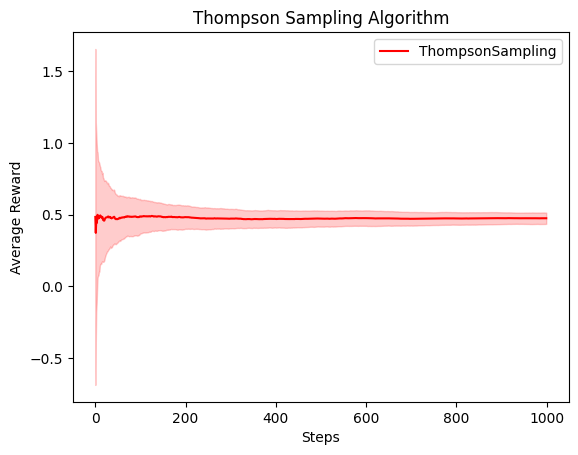

In [5]:
bandit = Bandit(k=10)
thompson_sampling = ThompsonSampling(k=10)

num_steps=1000
num_runs=100
all_rewards = np.zeros((num_runs, num_steps))
for i in range(num_runs):
    run_rewards, _ = run_bandit_algorithm(thompson_sampling, bandit, num_steps=num_steps)
    all_rewards[i] = run_rewards
avg_rewards = np.mean(all_rewards, axis=0)
std_rewards = np.std(all_rewards, axis=0)
upper_bound = avg_rewards + std_rewards
lower_bound = avg_rewards - std_rewards
plt.plot(avg_rewards, alpha=1.0, color='red', label=type(thompson_sampling).__name__)
plt.fill_between(range(num_steps), upper_bound, lower_bound, alpha=0.2, color='red')

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Thompson Sampling Algorithm')
plt.legend()
plt.show()

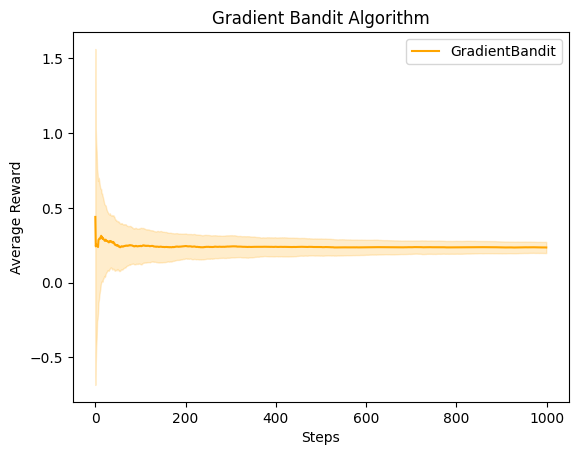

In [6]:
bandit = Bandit(k=10)
gradient_bandit = GradientBandit(alpha=0.1, k=10)

num_steps=1000
num_runs=100
all_rewards = np.zeros((num_runs, num_steps))
for i in range(num_runs):
    run_rewards, _ = run_bandit_algorithm(gradient_bandit, bandit, num_steps=num_steps)
    all_rewards[i] = run_rewards
avg_rewards = np.mean(all_rewards, axis=0)
std_rewards = np.std(all_rewards, axis=0)
upper_bound = avg_rewards + std_rewards
lower_bound = avg_rewards - std_rewards
plt.plot(avg_rewards, alpha=1.0, color='orange', label=type(gradient_bandit).__name__)
plt.fill_between(range(num_steps), upper_bound, lower_bound, alpha=0.2, color='orange')

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Gradient Bandit Algorithm')
plt.legend()
plt.show()

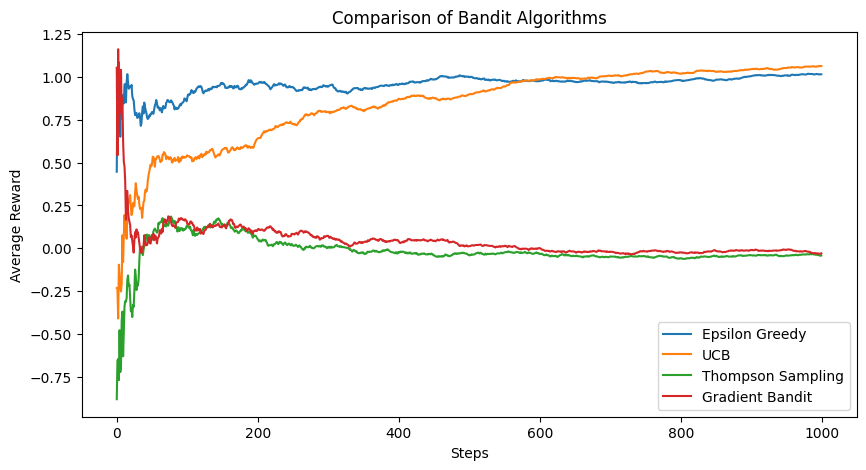

In [7]:
bandit = Bandit(k=10)
eps_greedy = EpsilonGreedy(epsilon=0.1, k=10)
ucb = UCB(c=2, k=10)
thompson_sampling = ThompsonSampling(k=10)
gradient_bandit = GradientBandit(alpha=0.1, k=10)

avg_rewards_1, frac_optimal_1 = run_bandit_algorithm(eps_greedy, bandit, num_steps=1000)
avg_rewards_2, frac_optimal_2 = run_bandit_algorithm(ucb, bandit, num_steps=1000)
avg_rewards_3, frac_optimal_3 = run_bandit_algorithm(thompson_sampling, bandit, num_steps=1000)
avg_rewards_4, frac_optimal_4 = run_bandit_algorithm(gradient_bandit, bandit, num_steps=1000)

plt.figure(figsize=(10, 5))
plt.plot(avg_rewards_1, label='Epsilon Greedy')
plt.plot(avg_rewards_2, label='UCB')
plt.plot(avg_rewards_3, label='Thompson Sampling')
plt.plot(avg_rewards_4, label='Gradient Bandit')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Comparison of Bandit Algorithms')
plt.legend()
plt.show()

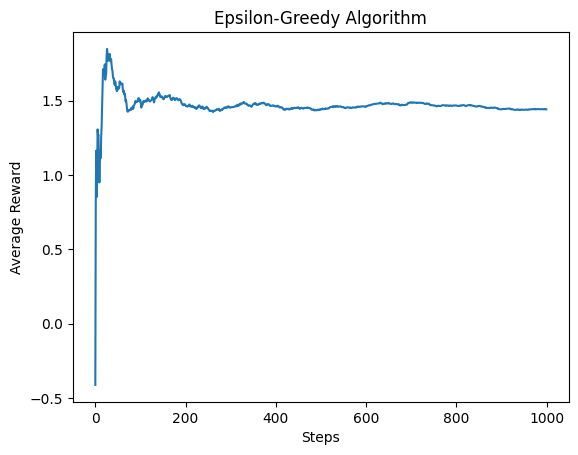

Fraction of times optimal action selected: 0.898


In [8]:
bandit = Bandit(k=10)
epsilon_greedy = EpsilonGreedy(epsilon=0.1, k=10)

avg_rewards, frac_optimal = run_bandit_algorithm(epsilon_greedy, bandit, num_steps=1000)

plt.plot(avg_rewards)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Epsilon-Greedy Algorithm')
plt.show()

print('Fraction of times optimal action selected:', frac_optimal)


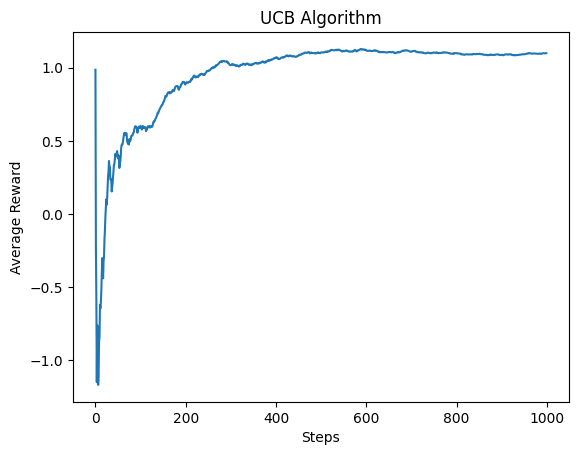

Fraction of times optimal action selected: 0.783


In [9]:
bandit = Bandit(k=10)
ucb = UCB(c=2, k=10)

avg_rewards, frac_optimal = run_bandit_algorithm(ucb, bandit, num_steps=1000)

plt.plot(avg_rewards)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('UCB Algorithm')
plt.show()

print('Fraction of times optimal action selected:', frac_optimal)


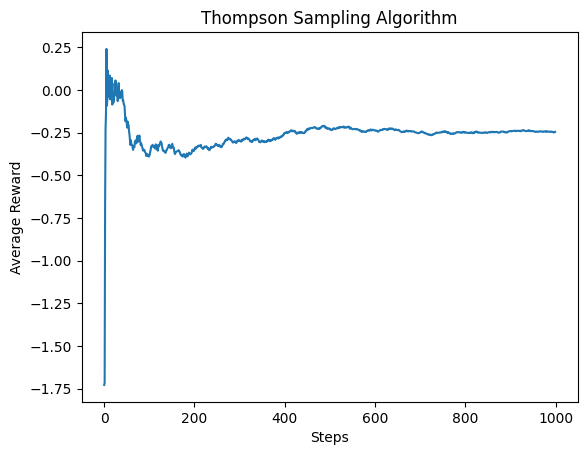

Fraction of times optimal action selected: 0.102


In [10]:
bandit = Bandit(k=10)
thompson_sampling = ThompsonSampling(k=10)

avg_rewards, frac_optimal = run_bandit_algorithm(thompson_sampling, bandit, num_steps=1000)

plt.plot(avg_rewards)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Thompson Sampling Algorithm')
plt.show()

print('Fraction of times optimal action selected:', frac_optimal)


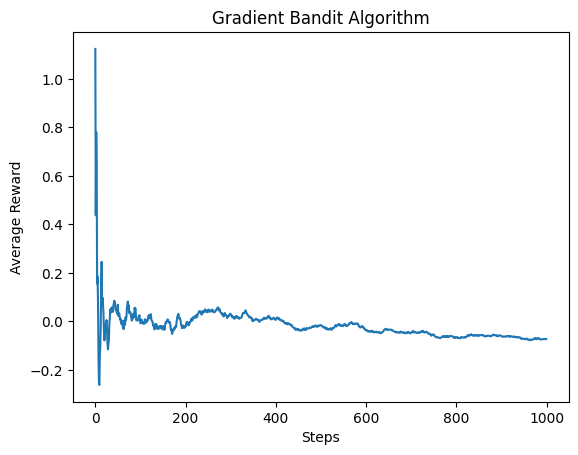

Fraction of times optimal action selected: 0.102


In [11]:
bandit = Bandit(k=10)
gradient_bandit = GradientBandit(alpha=0.1, k=10)

avg_rewards, frac_optimal = run_bandit_algorithm(gradient_bandit, bandit, num_steps=1000)

plt.plot(avg_rewards)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Gradient Bandit Algorithm')
plt.show()

print('Fraction of times optimal action selected:', frac_optimal)


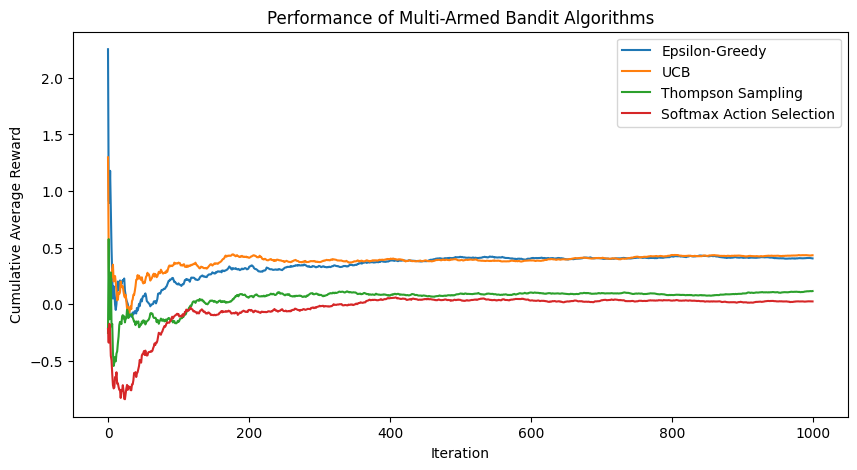

In [12]:
# teacher example
import numpy as np
import matplotlib.pyplot as plt

# Define the number of arms and the true mean rewards for each arm
num_arms = 10
mean_rewards = np.random.normal(0, 1, num_arms)
# Define the number of iterations and the epsilon parameter for the epsilon-greedy algorithm
num_iterations = 1000
epsilon = 0.1
# Define the initial estimated rewards for each arm
estimated_rewards = np.zeros(num_arms)
# Define the history of rewards and choices for each algorithm
epsilon_greedy_rewards = []
epsilon_greedy_choices = []
ucb_rewards = []
ucb_choices = []
thompson_rewards = []
thompson_choices = []
softmax_rewards = []
softmax_choices = []
# Define the main loop for the simulation
for i in range(num_iterations):
  # Epsilon-Greedy Algorithm
  if np.random.rand() < epsilon:
    # Select a random arm
    arm = np.random.randint(num_arms)
  else:
    # Select the arm with the highest estimated reward
    arm = np.argmax(estimated_rewards)
    # Pull the selected arm and observe the reward
    reward = np.random.normal(mean_rewards[arm], 1)
  # Update the estimated reward for the selected arm
  estimated_rewards[arm] += (1/(i+1)) * (reward - estimated_rewards[arm])
  # Append the reward and choice to the history lists
  epsilon_greedy_rewards.append(reward)
  epsilon_greedy_choices.append(arm)
  # UCB Algorithm
  ucb = estimated_rewards + np.sqrt(2*np.log(i+1)/(1+np.array(list(range(num_arms))))) # Calculate the upper confidence bound for each a
  arm = np.argmax(ucb) # Select the arm with the highest upper confidence bound
  reward = np.random.normal(mean_rewards[arm], 1)
  estimated_rewards[arm] += (1/(i+1)) * (reward - estimated_rewards[arm])
  ucb_rewards.append(reward)
  ucb_choices.append(arm)
  # Thompson Sampling
  samples = [np.random.normal(estimated_rewards[j], 1) for j in range(num_arms)] # Sample a reward distribution for each arm
  arm = np.argmax(samples) # Select the arm with the highest expected reward based on the sampled distributions
  reward = np.random.normal(mean_rewards[arm], 1)
  estimated_rewards[arm] += (1/(i+1)) * (reward - estimated_rewards[arm])
  thompson_rewards.append(reward)
  thompson_choices.append(arm)
  # Softmax Action Selection
  softmax_probs = np.exp(estimated_rewards) / np.sum(np.exp(estimated_rewards)) # Compute the softmax probabilities for each arm
  arm = np.random.choice(range(num_arms), p=softmax_probs) # Select an arm according to the computed probabilities
  reward = np.random.normal(mean_rewards[arm], 1)
  estimated_rewards[arm] += (1/(i+1)) * (reward - estimated_rewards[arm])
  softmax_rewards.append(reward)
  softmax_choices.append(arm)
# Plot the performance of each algorithm in terms of convergence to mean values
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(epsilon_greedy_rewards) / (1 + np.arange(num_iterations)), label='Epsilon-Greedy')
plt.plot(np.cumsum(ucb_rewards) / (1 + np.arange(num_iterations)), label='UCB')
plt.plot(np.cumsum(thompson_rewards) / (1 + np.arange(num_iterations)), label='Thompson Sampling')
plt.plot(np.cumsum(softmax_rewards) / (1 + np.arange(num_iterations)), label='Softmax Action Selection')
plt.legend()
plt.title('Performance of Multi-Armed Bandit Algorithms')
plt.xlabel('Iteration')
plt.ylabel('Cumulative Average Reward')
plt.show()